In [1]:
%matplotlib inline

In [2]:
from IPython.display import display

import numpy
import matplotlib
from numpy import linspace
from sympy import lambdify, init_printing
from sympy import symbols, pi, sqrt, exp, sin

from matplotlib import pyplot

matplotlib.rcParams['axes.grid'] = True
matplotlib.rcParams['grid.color'] = 'k'
matplotlib.rcParams['grid.linestyle'] = ':'
matplotlib.rcParams['grid.linewidth'] = 0.5

init_printing()

# Logistic function

$$ f(x) = \frac{L}{1 + e^{-k(x-x_0)}} $$

where
- $L$ is the maximum value of the function
- $x_0$ is the midpoint
- $k$ is the stepness of the curve at the midpoint
- $e$ is the natural logarithm

We will simplify now the function by setting $L=1$, $k=1$ and $x_0=0$.

$$ f(x) = \frac{1}{1 + e^{-x}} $$

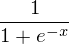

In [3]:
from sympy import simplify

s_x = symbols('x')

logistic = 1/(1 + exp(-s_x))
display(logistic)

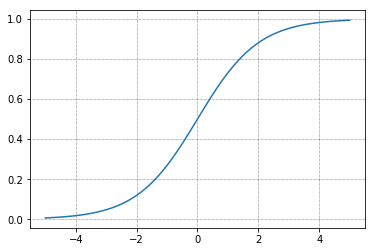

In [4]:
logistic_f = lambdify((s_x), logistic, "numpy")

a = linspace(-5,5,100)
pyplot.plot(a, logistic_f(a))

# Samples

Lets assume that the logistic regression defines a Bernoulli random variable $Y$ for each variable $X$. This can be interpreted as the posterior probabilities

$$ P(Y|X) = f(x) = \frac{1}{1 + e^{-x}} $$

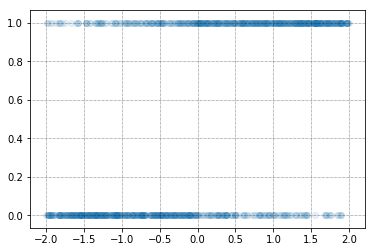

In [5]:
N = 1000
# x = numpy.random.randn(N, 1)
x = (numpy.random.random(N) - 0.5)*4
y = numpy.zeros((N, 1))
for i in range(N):
    y[i] = numpy.random.binomial(1, logistic_f(x[i]), 1)
    
pyplot.scatter(x, y, alpha=0.1)

/home/maikel/git/uob/RecyclingLabels/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


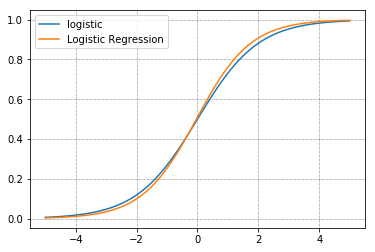

In [6]:
import sklearn
from sklearn.linear_model import LogisticRegression
# TODO change the implementation from Sklearn for my own

LR = LogisticRegression()
LR.fit(x.reshape(-1,1), y)

a = linspace(-5,5,100).reshape(-1,1)
pyplot.plot(a, logistic_f(a), label='logistic')
pyplot.plot(a, LR.predict_proba(a)[:,1], label='Logistic Regression')
pyplot.legend()

# Estimation problems

We may be interested on solving different problems

1. Classification problem: only interested on the most probable class (mostly applied in AI)
2. Class probability estimation: approximate the conditional posterior probability (mostly applied in statistics)

## Classification

Interested in reducing the **classification error** but difficult to use as an optimization method because of the properties of this type of functions. For that reason, it is common to use **surrogate functions**.

Some examples of surrogate functions for classification are:

- Log-loss: $L(y|q) = -\log(q^y(1-q)^{1-y} = -y \log(q) - (1-y) \log(1-q)$
- Squared error loss: $L(y|q) = (y-q)^2 = y(1-q)^2 + (1-y)q^2$

Log-loss is the negative log-likelihood of the Bernoulli model.

These losses are Fisher consistent estimates of $\eta$ because

$$\eta = argmin_{q\in [0,1]} E_y L(y|q) \text{, for }y \sim Bernoulli(\eta)$$

And are know as **proper scoring rules**

# TODO understand why the previous definition is correct given that 

sometimes the argmin is not able to find the true conditional posterior probabilities

/home/maikel/git/uob/RecyclingLabels/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


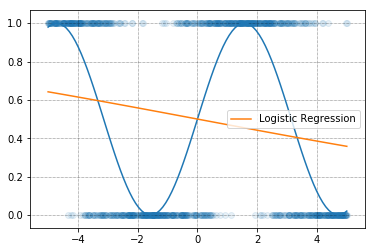

In [7]:
# TODO understand why the previous definition is correct given that

sinoidal = sin(s_x)/2+0.5
sinoidal_f = lambdify((s_x), sinoidal, "numpy")

pyplot.plot(a, sinoidal_f(a))

x = (numpy.random.random(N)-0.5)*10
for i in range(N):
    y[i] = numpy.random.binomial(1, sinoidal_f(x[i]), 1)
    
pyplot.scatter(x, y, alpha=0.1)

LR = LogisticRegression()
LR.fit(x.reshape(-1,1), y)

a = linspace(-5,5,100).reshape(-1,1)
pyplot.plot(a, LR.predict_proba(a)[:,1], label='Logistic Regression')
pyplot.legend()